In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

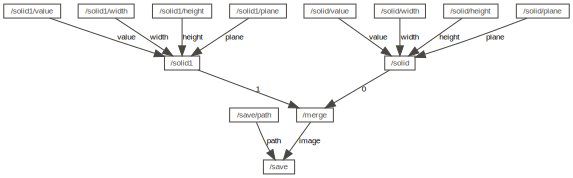

INFO:imagecat:Task /solid solid C width 128 height 128 value [1.  0.5 0. ] result C(128x128x3 float16)
INFO:imagecat:Task /solid1 solid A width 128 height 128 value [0.5] result A(128x128x1 float16)
INFO:imagecat:Task /merge merge result C(128x128x3 float16) A(128x128x1 float16)



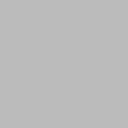
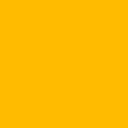

In [2]:
graph = graphcat.Graph()
imagecat.add_operation(graph, "/solid", imagecat.solid, value=(1, 0.5, 0), width=128, height=128, plane="C")
imagecat.add_operation(graph, "/solid", imagecat.solid, value=(0.5,), width=128, height=128, plane="A")
imagecat.add_operation(graph, "/merge", imagecat.merge)
imagecat.add_operation(graph, "/save", imagecat.save, path="test.exr")
graph.set_links("/solid", ("/merge", 0))
graph.set_links("/solid1", ("/merge", 1))
graph.set_links("/merge", ("/save", "image"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/merge"))

In [3]:
graph.update("/save")

DEBUG:imagecat.io:{'channels': {'C.r': HALF (1, 1), 'C.g': HALF (1, 1), 'C.b': HALF (1, 1), 'A': HALF (1, 1)}, 'compression': ZIP_COMPRESSION, 'dataWindow': (0, 0) - (127, 127), 'displayWindow': (0, 0) - (127, 127), 'lineOrder': INCREASING_Y, 'pixelAspectRatio': 1.0, 'screenWindowCenter': (0.0, 0.0), 'screenWindowWidth': 1.0}
